# scipy.signal Module Overview

The `scipy.signal` module provides functions for signal processing tasks, including filtering, convolution, spectral analysis, and more.

## 1. Signal Filtering

### FIR Filter Design
- **`scipy.signal.firwin(numtaps, cutoff, window)`**: Designs an FIR filter using the window method.
- **`numtaps`**: Number of filter taps.
- **`cutoff`**: Cutoff frequency (normalized from 0 to 1).

### IIR Filter Design
- **`scipy.signal.butter(N, Wn, btype)`**: Designs a Butterworth IIR filter.
- **`N`**: Filter order.
- **`Wn`**: Critical frequency (normalized from 0 to 1).
- **`btype`**: Type of filter (e.g., 'low', 'high', 'band').

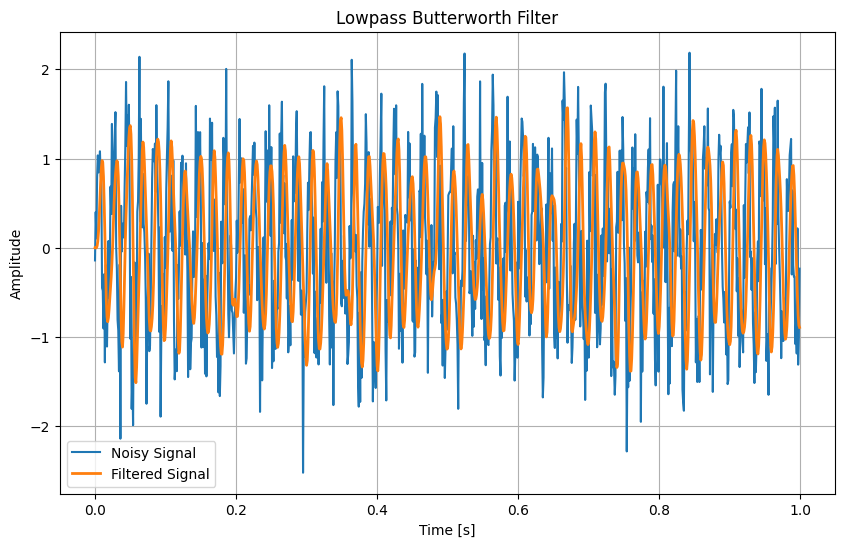

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1.0, 1/fs)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.normal(size=t.shape)

# Design a lowpass Butterworth filter
N = 4  # Filter order
Wn = 100 / (0.5 * fs)  # Normalized cutoff frequency
b, a = butter(N, Wn, btype='low')

# Apply the filter
filtered_signal = lfilter(b, a, signal)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
plt.title('Lowpass Butterworth Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## 2. Convolution
### Convolution of Signals
`scipy.signal.convolve(in1, in2, mode):` Computes the convolution of two signals.
`mode:` Type of convolution ('full', 'valid', or 'same').

In [2]:
from scipy.signal import convolve

# Create two sample signals
signal1 = np.array([1, 2, 3, 4])
signal2 = np.array([0, 1, 0.5])

# Perform convolution
conv_result = convolve(signal1, signal2, mode='full')

print('Convolution Result:', conv_result)

Convolution Result: [0.  1.  2.5 4.  5.5 2. ]


## 3. Spectral Analysis
### Fourier Transform
- `scipy.signal.fft`: Functions for computing the Fast Fourier Transform (FFT) and its inverse.
- `scipy.signal.welch`: Estimates the power spectral density using the Welch method.

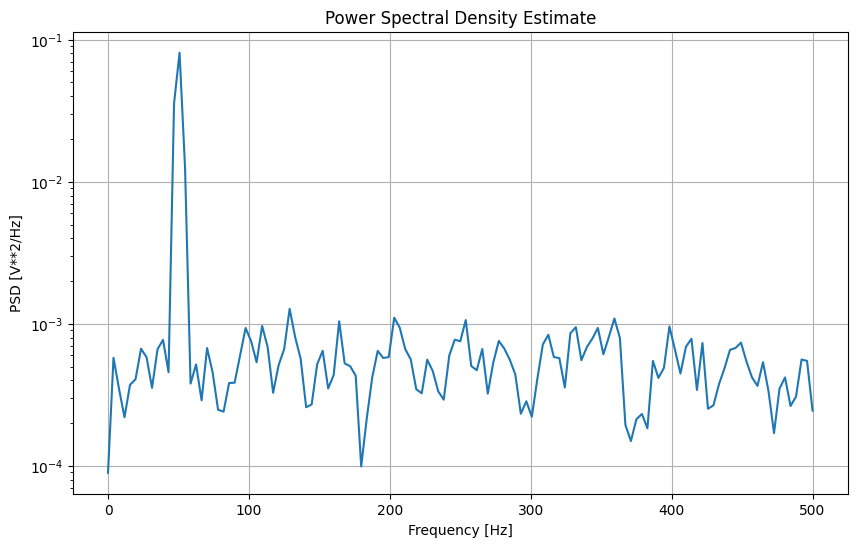

In [3]:
from scipy.signal import welch

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1.0, 1/fs)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.normal(size=t.shape)

# Estimate power spectral density
frequencies, psd = welch(signal, fs)

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density Estimate')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.show()

## 4. Signal Generation
### Generate Sample Signals
- `scipy.signal.chirp:` Generates a chirp signal.
- `scipy.signal.square`: Generates a square wave signal.
- `scipy.signal.sawtooth`: Generates a sawtooth wave signal.

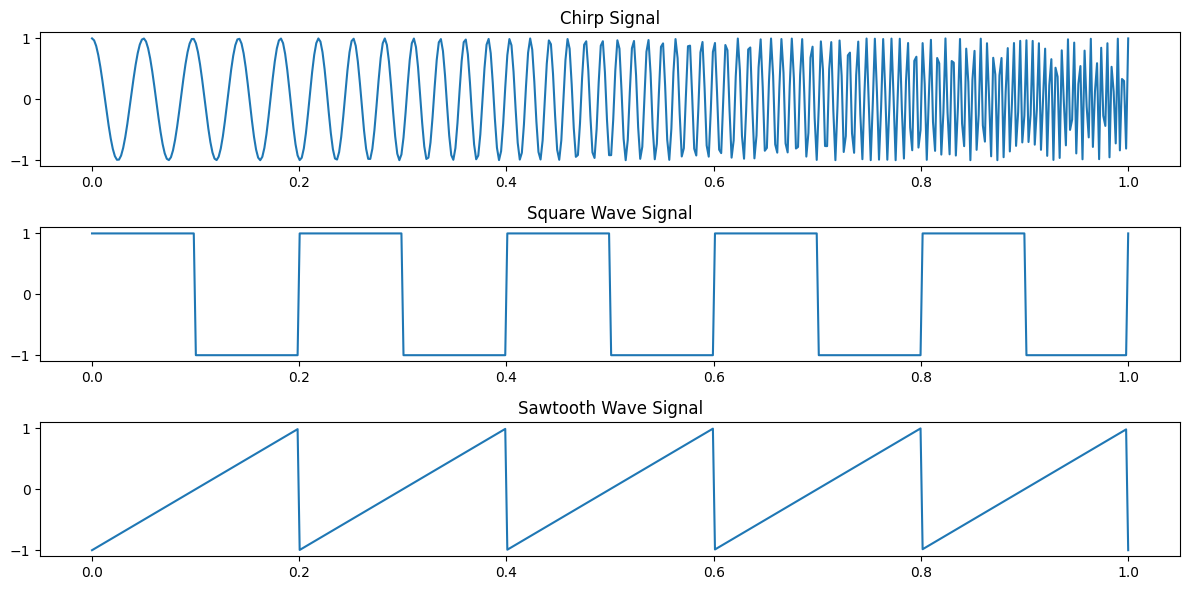

In [4]:
from scipy.signal import chirp, square, sawtooth

# Create time array
t = np.linspace(0, 1, 500)

# Generate signals
chirp_signal = chirp(t, f0=20, f1=200, t1=1, method='quadratic')
square_wave = square(2 * np.pi * 5 * t)
sawtooth_wave = sawtooth(2 * np.pi * 5 * t)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, chirp_signal)
plt.title('Chirp Signal')
plt.subplot(3, 1, 2)
plt.plot(t, square_wave)
plt.title('Square Wave Signal')
plt.subplot(3, 1, 3)
plt.plot(t, sawtooth_wave)
plt.title('Sawtooth Wave Signal')
plt.tight_layout()
plt.show()